In [0]:
!pip install xlsxwriter
from google.colab import files

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# read data
reviews_df_main = pd.read_excel("RC.xlsx")
reviews_df = pd.DataFrame()
reviews_df['review'] = reviews_df_main["Review"]
reviews_df['OTA'] = reviews_df_main['OTA']

reviews_df['gender'] = reviews_df_main['Gender']

reviews_df.head()

,review,OTA,gender
0,"Hello all, I am writing a review on Makemytrip...",MMT,male
1,"Hello Friends,\nI have booked a room in Raddis...",MMT,Male
2,I was trying to book an intl flight for 4 pass...,MMT,male
3,Unbeatable match with other trip booking apps ...,MMT,female
4,They cannot be reliable in matter of hotel boo...,MMT,male


In [0]:
#removing all the \n 
reviews_df["review"] = [x.replace("\n", " ") for x in reviews_df["review"] ]

In [0]:
reviews_df["gender"] = reviews_df["gender"].str.lower()
reviews_df["gender"] = reviews_df["gender"].str.strip()
reviews_df.dropna(subset=['gender'],inplace=True)


reviews_df = reviews_df[reviews_df["gender"] == "male"]

In [0]:
len(reviews_df)

1446

In [0]:

# return the wordnet object value corresponding to the POS tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    #only selecting nouns
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags if t[1].startswith('N')]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review"] = reviews_df["review"].apply(lambda x : str(x))
reviews_df["review_clean"] = reviews_df['review'].apply(lambda x: clean_text(x))

reviews_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,OTA,gender,review_clean
0,"Hello all, I am writing a review on Makemytrip...",MMT,male,hello review reference experience user journey...
1,"Hello Friends, I have booked a room in Raddiso...",MMT,male,hello friend room raddison atrium trip amount ...
2,I was trying to book an intl flight for 4 pass...,MMT,male,book intl flight passenger amount makemytrip t...
4,They cannot be reliable in matter of hotel boo...,MMT,male,cannot matter hotel booking island hotel booki...
5,A gyst on just concluded 'THAILAND TOUR'... Th...,MMT,male,gyst meeting discussion argument preparation s...


In [0]:
reviews_df["words"] = reviews_df["review_clean"].apply(lambda x: x.split(" "))
reviews_df.head()


,review,OTA,gender,review_clean,words
0,"Hello all, I am writing a review on Makemytrip...",MMT,male,hello review reference experience user journey...,"[hello, review, reference, experience, user, j..."
1,"Hello Friends, I have booked a room in Raddiso...",MMT,male,hello friend room raddison atrium trip amount ...,"[hello, friend, room, raddison, atrium, trip, ..."
2,I was trying to book an intl flight for 4 pass...,MMT,male,book intl flight passenger amount makemytrip t...,"[book, intl, flight, passenger, amount, makemy..."
4,They cannot be reliable in matter of hotel boo...,MMT,male,cannot matter hotel booking island hotel booki...,"[cannot, matter, hotel, booking, island, hotel..."
5,A gyst on just concluded 'THAILAND TOUR'... Th...,MMT,male,gyst meeting discussion argument preparation s...,"[gyst, meeting, discussion, argument, preparat..."


In [0]:


def WordClassifier1(row):
  posi_words = []
  for word in row:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        posi_words.append(word)
    
  return posi_words

def WordClassifier2(row):
  negi_words = []
  for word in row:
    if (sid.polarity_scores(word)['compound']) <= -0.3:
        negi_words.append(word)
   
  return negi_words
  

def WordClassifier3(row):
  
  neu_words = []
  for word in row:
    if not (sid.polarity_scores(word)['compound']) >= 0.5   and not (sid.polarity_scores(word)['compound']) <= -0.5:
        neu_words.append(word)
    
  return neu_words
  
  
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


#abc = []  
#reviews_df = reviews_df["words"].apply(WordClassifier )
#abc_df["posi_words" , "neu_words" , "negi_words"] = reviews_df["words"].apply(lambda x: WordClassifier1(x))

reviews_df["posi_words"] = reviews_df["words"].apply(lambda x: WordClassifier1(x))
reviews_df["negi_words"] = reviews_df["words"].apply(lambda x: WordClassifier2(x))
reviews_df["neu_words"] = reviews_df["words"].apply(lambda x: WordClassifier3(x))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
#breaking point to select overall or just the OTA wise data 
#ClearTrip', 'Goibibo', 'MMT', 'Redbus', 'Yatra'

reviews_df = reviews_df[reviews_df["OTA"] == "MMT"]

#reviews_df


In [0]:
#collecting the total number of words from all reviews in one list

#reviews_df["review_clean"].value_counts()


total_pos_words = []
total_neg_words = []

for i in reviews_df["posi_words"]:
  for j in i:
    total_pos_words.append(j)
    
for i in reviews_df["negi_words"]:
  for j in i:
    total_neg_words.append(j)

In [0]:
#counting the occurences of the total number of words in positive and negative 
#list.count(total_pos_words)

total_poswords_df = pd.DataFrame()
total_negwords_df = pd.DataFrame()
total_poswords_df["words"] = total_pos_words 
total_negwords_df["words"] = total_neg_words
#wordfreq = [total_pos_words.count(w) for w in total_pos_words]
total_poswords_df["freq"] = [total_pos_words.count(w) for w in total_pos_words]
total_negwords_df["freq"] = [total_neg_words.count(w) for w in total_neg_words]
#total_negwords_df


In [0]:
#removing duplicates
total_poswords_df = total_poswords_df.drop_duplicates()
total_negwords_df = total_negwords_df.drop_duplicates()

#total_words_df.drop_duplicates(keep=False,inplace=True)

#total_words_df.sort_values("freq", inplace=True) 
#np.sum(total_negwords_df["freq"])



In [0]:
#most occuring positive words
total_poswords_df = total_poswords_df.sort_values("freq" , ascending = False)
total_poswords_df

,words,freq
4,care,193
1,support,115
28,please,73
39,friend,63
31,help,62
...,...,...
511,progress,1
516,trustworthy,1
517,beneficial,1
270,freebie,1


In [0]:
#most occuring negative words
total_negwords_df = total_negwords_df.sort_values("freq" , ascending = False)
total_negwords_df[["words" , "freq"]]

,words,freq
11,problem,68
10,fraud,60
8,cheat,34
26,mistake,31
22,cheater,29
...,...,...
278,fight,1
284,vain,1
285,embarrassment,1
286,discomfort,1


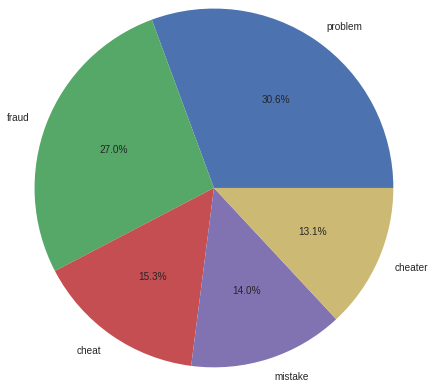

In [0]:
abc = "overall-female"

#words = [ x for x in total_neg_words["words"] ]
#total_negwords_df["words"]
plt.pie(total_negwords_df["freq"].head(5),labels=total_negwords_df["words"].head(5), autopct='%1.1f%%',radius=1.5)
plt.savefig(abc+' negative.png', dpi=200)  
plt.show()

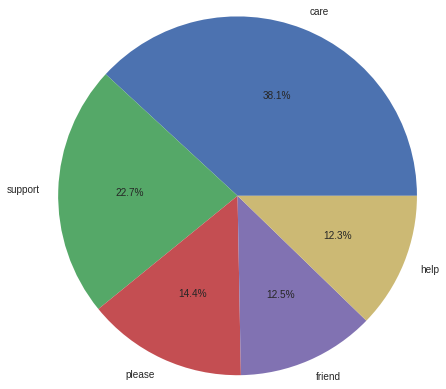

In [0]:


#words = [ x for x in total_neg_words["words"] ]
#total_negwords_df["words"]
plt.pie(total_poswords_df["freq"].head(5),labels=total_poswords_df["words"].head(5), autopct='%1.1f%%',radius=1.5)
plt.savefig(abc+' positive.png', dpi=200)  
plt.show()


In [0]:


total_negwords_df["polarity"] = total_negwords_df["words"].apply(lambda x: sid.polarity_scores(x)['compound'])
total_poswords_df["polarity"] = total_poswords_df["words"].apply(lambda x: sid.polarity_scores(x)['compound'])

In [0]:
writer = pd.ExcelWriter(abc+'.xlsx', engine='xlsxwriter')

total_poswords_df.to_excel(writer,index = False , sheet_name='Positive')
worksheet = writer.sheets['Positive']
worksheet.insert_image('D3', abc+' positive.png')

total_negwords_df.to_excel(writer,index = False , sheet_name='Negative')
worksheet = writer.sheets['Negative']
worksheet.insert_image('D3', abc+' negative.png')


writer.save()

In [0]:
#Automated code

OTAs = ['ClearTrip', 'Goibibo', 'MMT', 'Redbus', 'Yatra']

for OTA in OTAs:
  reviews_OTA_df = reviews_df[reviews_df["OTA"] == OTA]
  total_pos_words = []
  total_neg_words = []

  for i in reviews_OTA_df["posi_words"]:
    for j in i:
      total_pos_words.append(j)
      
  for i in reviews_OTA_df["negi_words"]:
    for j in i:
      total_neg_words.append(j)
  
  total_poswords_df = pd.DataFrame()
  total_negwords_df = pd.DataFrame()
  total_poswords_df["words"] = total_pos_words 
  total_negwords_df["words"] = total_neg_words
  #wordfreq = [total_pos_words.count(w) for w in total_pos_words]
  total_poswords_df["freq"] = [total_pos_words.count(w) for w in total_pos_words]
  total_negwords_df["freq"] = [total_neg_words.count(w) for w in total_neg_words]
  total_poswords_df = total_poswords_df.drop_duplicates()
  total_negwords_df = total_negwords_df.drop_duplicates()

  total_poswords_df = total_poswords_df.sort_values("freq" , ascending = False)
  total_negwords_df = total_negwords_df.sort_values("freq" , ascending = False)
  total_negwords_df["polarity"] = total_negwords_df["words"].apply(lambda x: sid.polarity_scores(x)['compound'])
  total_poswords_df["polarity"] = total_poswords_df["words"].apply(lambda x: sid.polarity_scores(x)['compound'])
  
  abc = OTA+"-male"
  plt.pie(total_negwords_df["freq"].head(5),labels=total_negwords_df["words"].head(5), autopct='%1.1f%%',radius=1.5)
  plt.title(abc+' negative.png')
  plt.savefig(abc+' negative.png', dpi=200, bbox_inches="tight") 
  plt.close() 
  plt.pie(total_poswords_df["freq"].head(5),labels=total_poswords_df["words"].head(5), autopct='%1.1f%%',radius=1.5)
  plt.title(abc+' positive.png')
  plt.savefig(abc+' positive.png', dpi=200, bbox_inches="tight") 
  plt.close()

  writer = pd.ExcelWriter(abc+'.xlsx', engine='xlsxwriter')

  total_poswords_df.to_excel(writer,index = False , sheet_name='Positive')
  worksheet = writer.sheets['Positive']
  worksheet.insert_image('D3', abc+' positive.png')

  total_negwords_df.to_excel(writer,index = False , sheet_name='Negative')
  worksheet = writer.sheets['Negative']
  worksheet.insert_image('D3', abc+' negative.png')
  writer.save()

  files.download(abc+'.xlsx')
  files.download(abc+' positive.png')
  files.download(abc+' negative.png')
  













  

hello-wow
